In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/itsc-ml-challenge-26jun/DATA_R.xlsx
/kaggle/input/itsc-ml-challenge-26jun/DATA_P.xlsx


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style('darkgrid')
sns.set(font_scale=1.3)

In [3]:
import pip
pip.main(["install", "openpyxl"])

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


Collecting openpyxl

Downloading openpyxl-3.0.10-py2.py3-none-any.whl (242 kB)

Output()

Collecting et-xmlfile

Downloading et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)

Installing collected packages: et-xmlfile, openpyxl

Successfully installed et-xmlfile-1.1.0 openpyxl-3.0.10

WARNING: Running pip as the 'root' user can result in broken permissions and conflicting behaviour with the system package manager. It is recommended to use a virtual environment instead: https://pip.pypa.io/warnings/venv


0

## **Read the Dataset**
1. Dataset consist of two columns, X and Y.
2. First 350 records are for training the model and remaining unlabelled data is for test purpose. 

In [4]:
df = pd.read_excel("/kaggle/input/itsc-ml-challenge-26jun/DATA_R.xlsx")

train = df.iloc[:350,1:] #segregate first 350 records as training data.
test = df.iloc[350:,1:] #remaining data to be treated as test.

In [5]:
display(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       350 non-null    float64
 1   Y       350 non-null    float64
dtypes: float64(2)
memory usage: 5.6 KB


None

In [6]:
train.describe()

,X,Y
count,350.000000,350.000000
mean,61.080000,70.677355
std,11.408005,5.447000
min,20.000000,57.586207
25%,52.000000,67.825093
50%,60.000000,70.000000
75%,68.000000,73.793103
max,92.000000,87.878788


# **Exploratory Data Analysis**
1. The EDA is performed on both the independent variable and dependent variable, based on which we will analyse the data and check if any outliers are there or not. 
2. EDA will help us to select our model based on visualizations ie whether to pick tree based model or linear models.

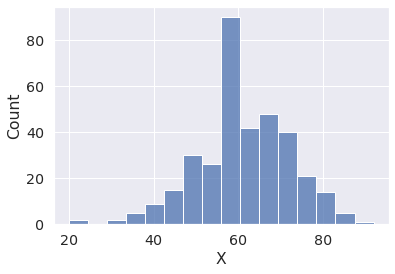

In [7]:
#1. Histogram Plot
sns.histplot(x='X', data=train);

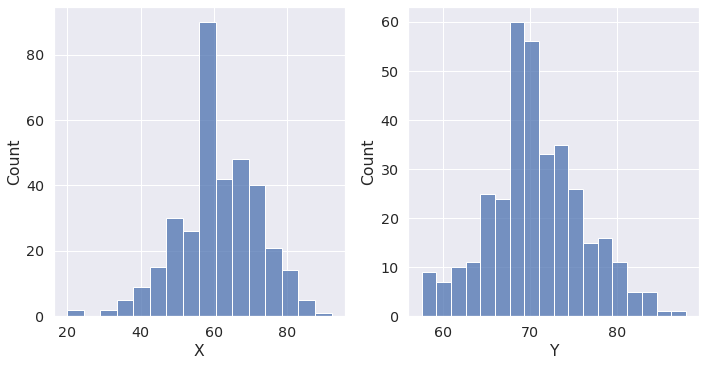

In [8]:
#2. Comparing both X, Y columns on Histogram plot. 

cols = 3
rows = 3
num_cols = train.select_dtypes(exclude='object').columns
fig = plt.figure( figsize=(cols*5, rows*5))
for i, col in enumerate(num_cols):
    
    ax=fig.add_subplot(rows,cols,i+1)
    
    sns.histplot(x = train[col], ax = ax)
    
fig.tight_layout()  
plt.show()

<AxesSubplot:>

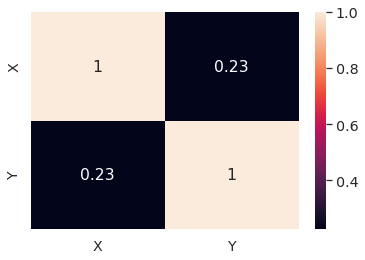

In [9]:
sns.heatmap(train.corr(), annot=True)

<AxesSubplot:xlabel='X'>

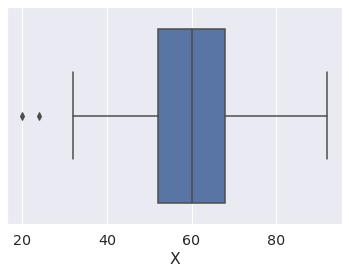

In [10]:
#3. This represents the box plot.

sns.boxplot(x=train['X'])

<AxesSubplot:>

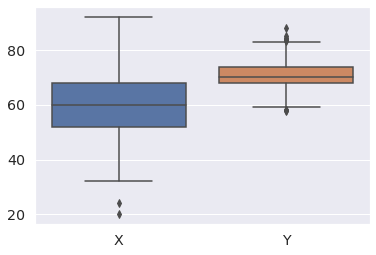

In [11]:
sns.boxplot(data=train.loc[:, ['X', 'Y']])

<AxesSubplot:xlabel='Y'>

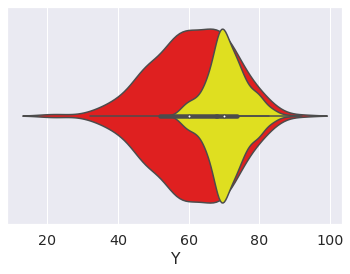

In [12]:
#4. Violin Plot for both X,Y variable 

sns.violinplot(x=train["X"], color='red')
sns.violinplot(x=train["Y"], color='yellow')

# **Creating a Train Test Split**
1. Train-Test split is 70:30 with random-state keeping as 33

In [13]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest = train_test_split(train[['X']], train[['Y']], test_size=0.3, random_state=33)

print(Xtrain.size, Xtest.size,  ytrain.size, ytest.size)

245 105 245 105


# **Model-1 Linear Regression**

In [14]:
#Linear Regression Model Training and Validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse

m1 = LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, 
                      n_jobs=5, positive=False)
m1.fit(Xtrain,ytrain)
ypred = m1.predict(Xtest)

s1 = (np.sqrt(mse(ytest, ypred)))
print(s1)

5.26592749598083


In [15]:
#Linear Regression Model prediction on Test dataset. 
pred = m1.predict(test[['X']])

sub1 = pd.DataFrame()
sub1['X'] = test['X']
sub1['Y'] = pred

sub1.to_csv('sub1.csv', index=False)

os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'sub1.csv')

/kaggle/working/sub1.csv

# **Model-2 Random Forest Regressor**

In [16]:
from sklearn.ensemble import RandomForestRegressor

m2 = RandomForestRegressor(n_estimators=1550, criterion='squared_error', max_depth=33, 
                           min_samples_split=7, min_samples_leaf=7, min_weight_fraction_leaf=0.0, 
                           max_features=1.0, max_leaf_nodes=3, min_impurity_decrease=0.0, 
                           bootstrap=True, oob_score=False, n_jobs=3, random_state=33, 
                           verbose=0, warm_start=True, ccp_alpha=0.0, max_samples=1)
m2.fit(Xtrain,ytrain)
ypred = m2.predict(Xtest)

s2 = (np.sqrt(mse(ytest, ypred)))
print(s2)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


5.3485357636748265


In [17]:
#Random Forest Model prediction on Test dataset. 
pred = m2.predict(test[['X']])

sub2 = pd.DataFrame()
sub2['X'] = test['X']
sub2['Y'] = pred

sub2.to_csv('sub2.csv', index=False)

os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'sub2.csv')

/kaggle/working/sub2.csv

# **Model-3 LightGBM Regressor**

In [18]:
from lightgbm import LGBMRegressor

m3 = LGBMRegressor(boosting_type='gbdt', num_leaves=6, max_depth=None, learning_rate=0.0017, 
                   n_estimators=1200, subsample_for_bin=200000, objective='regression', 
                   class_weight=None, min_split_gain=0.0, min_child_weight=0.001, min_child_samples=20, 
                   subsample=1.0, subsample_freq=0, colsample_bytree=1.0, reg_alpha=0.0, 
                   reg_lambda=0.0, random_state=33, n_jobs=3, importance_type='split')

m3.fit(Xtrain,ytrain)
ypred = m3.predict(Xtest)

s3 = (np.sqrt(mse(ytest, ypred)))
print(s3)

5.492376981530925


In [19]:
#LGBM Regressor Model prediction on Test dataset. 
pred = m2.predict(test[['X']])

sub3 = pd.DataFrame()
sub3['X'] = test['X']
sub3['Y'] = pred

sub3.to_csv('sub3.csv', index=False)

os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'sub3.csv')

/kaggle/working/sub3.csv

# **Model-4 GradientBoostingRegressor**

In [20]:
from sklearn.ensemble import GradientBoostingRegressor

m4 = GradientBoostingRegressor(loss='squared_error', learning_rate=0.017, n_estimators=1400, 
                               subsample=1.0, criterion='friedman_mse', min_samples_split=2, 
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=33, 
                               min_impurity_decrease=0.0, init=None, random_state=None, 
                               max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, 
                               warm_start=False, validation_fraction=0.1, n_iter_no_change=None, 
                               tol=0.0001, ccp_alpha=0.0)

m4.fit(Xtrain,ytrain)
ypred = m4.predict(Xtest)

s4 = (np.sqrt(mse(ytest, ypred)))
print(s4)

/opt/conda/lib/python3.7/site-packages/sklearn/ensemble/_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5.610986778592632


In [21]:
#Gradient Boosting predictions
pred = m4.predict(test[['X']])

sub4 = pd.DataFrame()
sub4['X'] = test['X']
sub4['Y'] = pred

sub4.to_csv('sub4.csv', index=False)

os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'sub4.csv')

/kaggle/working/sub4.csv

# **Model-5 RANSAC Model**

In [22]:
from sklearn.linear_model import RANSACRegressor

m5 = RANSACRegressor(base_estimator=None, min_samples=None, residual_threshold=None, is_data_valid=None, is_model_valid=None, 
                     max_trials=1000, max_skips=np.inf, stop_n_inliers=np.inf, stop_score=np.inf, stop_probability=0.99, 
                     loss="absolute_error", random_state=33)

m5.fit(Xtrain,ytrain)
ypred = m5.predict(Xtest)

s5 = (np.sqrt(mse(ytest, ypred)))
print(s5)

5.374011028023093


In [23]:
#RANSAC predictions
pred = m5.predict(test[['X']])

sub5 = pd.DataFrame()
sub5['X'] = test['X']
sub5['Y'] = pred

sub4.to_csv('sub5.csv', index=False)

os.chdir(r'../working')
from IPython.display import FileLink
FileLink(r'sub5.csv')

/kaggle/working/sub5.csv

# **Results Summary of all the Models above**

In [24]:
#Result Evaluation
scores = pd.DataFrame()
scores['Algorithm'] = ['Linear Regression', 'Random Forest', 'LightGBM', 'GradientBoosting', 'RANSAC']
scores['RMSE_Score'] = [s1,s2,s3,s4,s5]
scores['submission_file'] = [FileLink(r'sub1.csv'),FileLink(r'sub2.csv'),FileLink(r'sub3.csv'),
                             FileLink(r'sub4.csv'), FileLink(r'sub5.csv')] #prediction on test data

display(scores)

print(" ")
print(" ")
print("******* Winner Model *******")
print(" ")
print(" ")

display(scores[scores['RMSE_Score'] == min(scores['RMSE_Score'])])

,Algorithm,RMSE_Score,submission_file
0,Linear Regression,5.265927,/kaggle/working/sub1.csv
1,Random Forest,5.348536,/kaggle/working/sub2.csv
2,LightGBM,5.492377,/kaggle/working/sub3.csv
3,GradientBoosting,5.610987,/kaggle/working/sub4.csv
4,RANSAC,5.374011,/kaggle/working/sub5.csv


 
 
******* Winner Model *******
 
 


,Algorithm,RMSE_Score,submission_file
0,Linear Regression,5.265927,/kaggle/working/sub1.csv


In [25]:
winner = scores[scores['RMSE_Score'] == min(scores['RMSE_Score'])]['submission_file']

In [26]:
plot_df = pd.read_csv("/kaggle/working/"+winner.values[0].path)

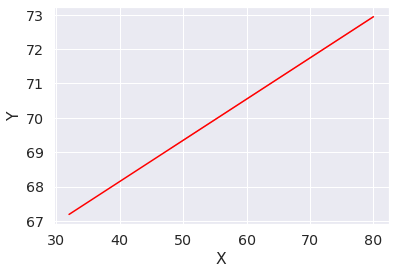

In [27]:
sns.lineplot(x = "X",
             y = "Y",
             data = plot_df, color='red');